<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Premium_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DBSCAN - Wholesale customer data

In [ ]:
!gdown 10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL

Downloading...
From: https://drive.google.com/uc?id=10ZdMFvfhGeXAa8xR0J00kHIHp9y9m9uL
To: /content/wholesaledata.csv
100% 15.0k/15.0k [00:00<00:00, 39.3MB/s]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.

In [ ]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

#### **Visualizing the data in 2D**

Using 2 features:

1. **Grocery:** The customer’s annual spending (in some monetary unit) on grocery products.
2. **Milk:** The customer’s annual spending (in some monetary unit) on milk products.

#### Let's plot two features data now:

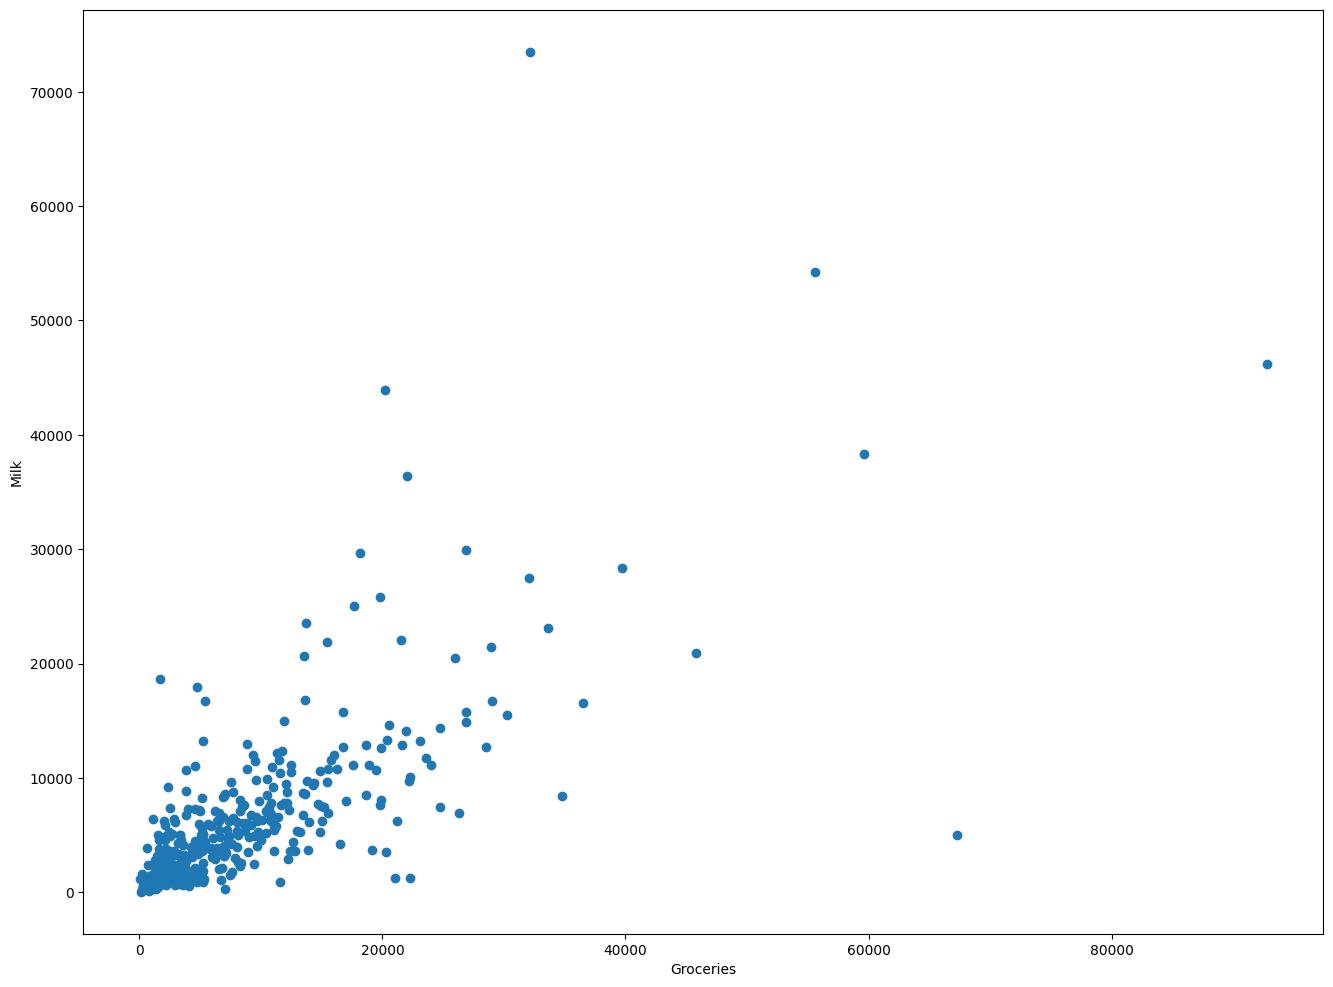

In [ ]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

**Q. Can you point out some problems that the clustering algorithms that we've learned till now might face?**

- We can easily see the data points that are far away from rest of the data points.

- Well, those are our **outlier** data points.

- **K-Means is sensitive to outliers** and will try to cluster the outliers as well.

In [ ]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

,Grocery,Milk,label
0,7561,9656,0
1,9568,9810,0
2,7684,8808,0
3,4221,1196,0
4,7198,5410,0
...,...,...,...
435,16027,12051,0
436,764,1431,0
437,30243,15488,1
438,2232,1981,0


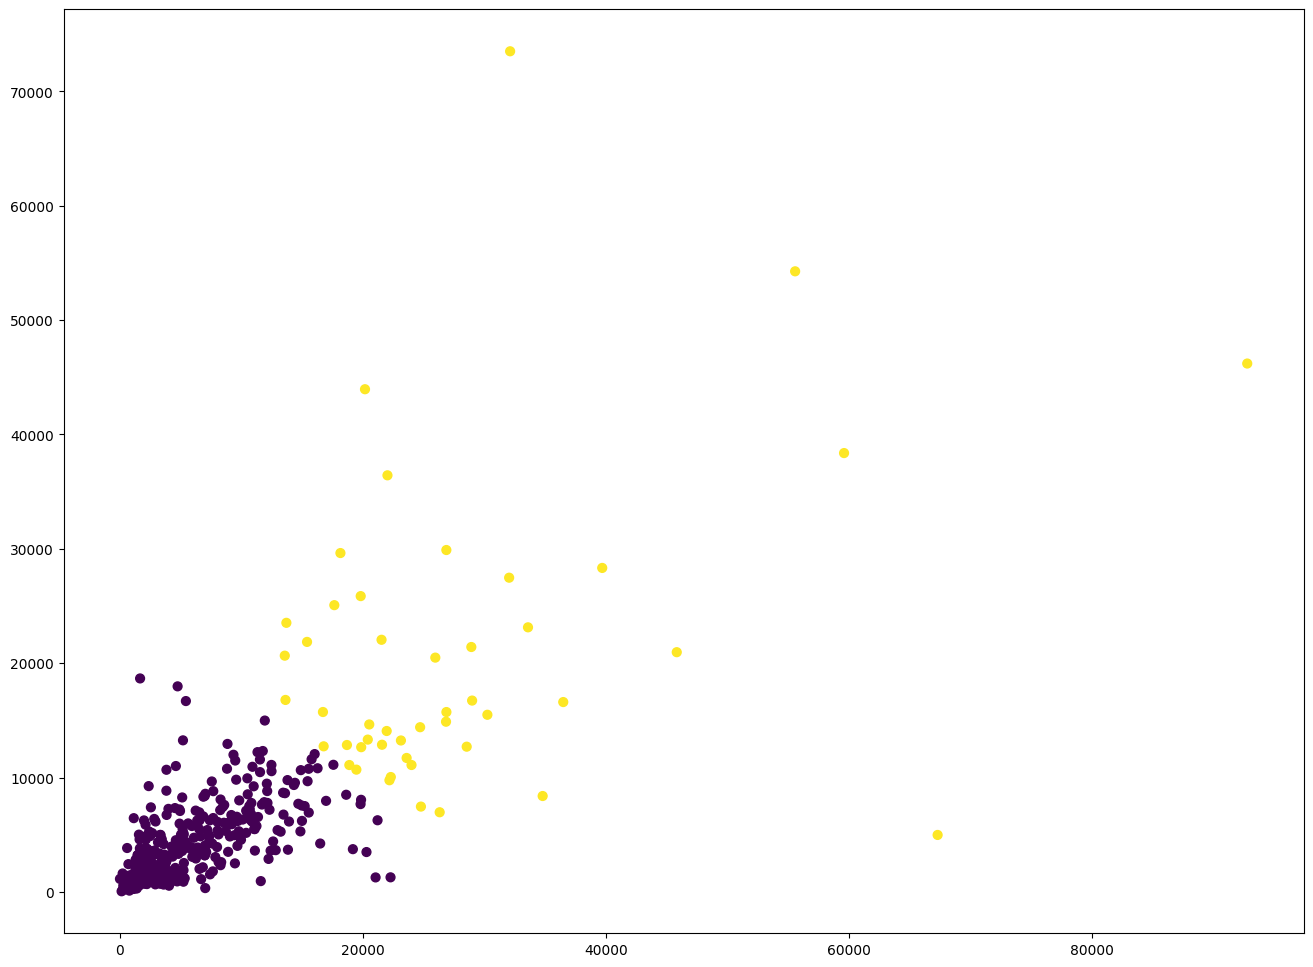

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

**Q. What about Hierarchical Clustering?**

- One can define the optimal number of clustering after the algorithm has converged. This can certainly reduce the affect of outliers on the results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agc_pred = agc.fit_predict(std_df)
clusters['agc labels'] = agc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



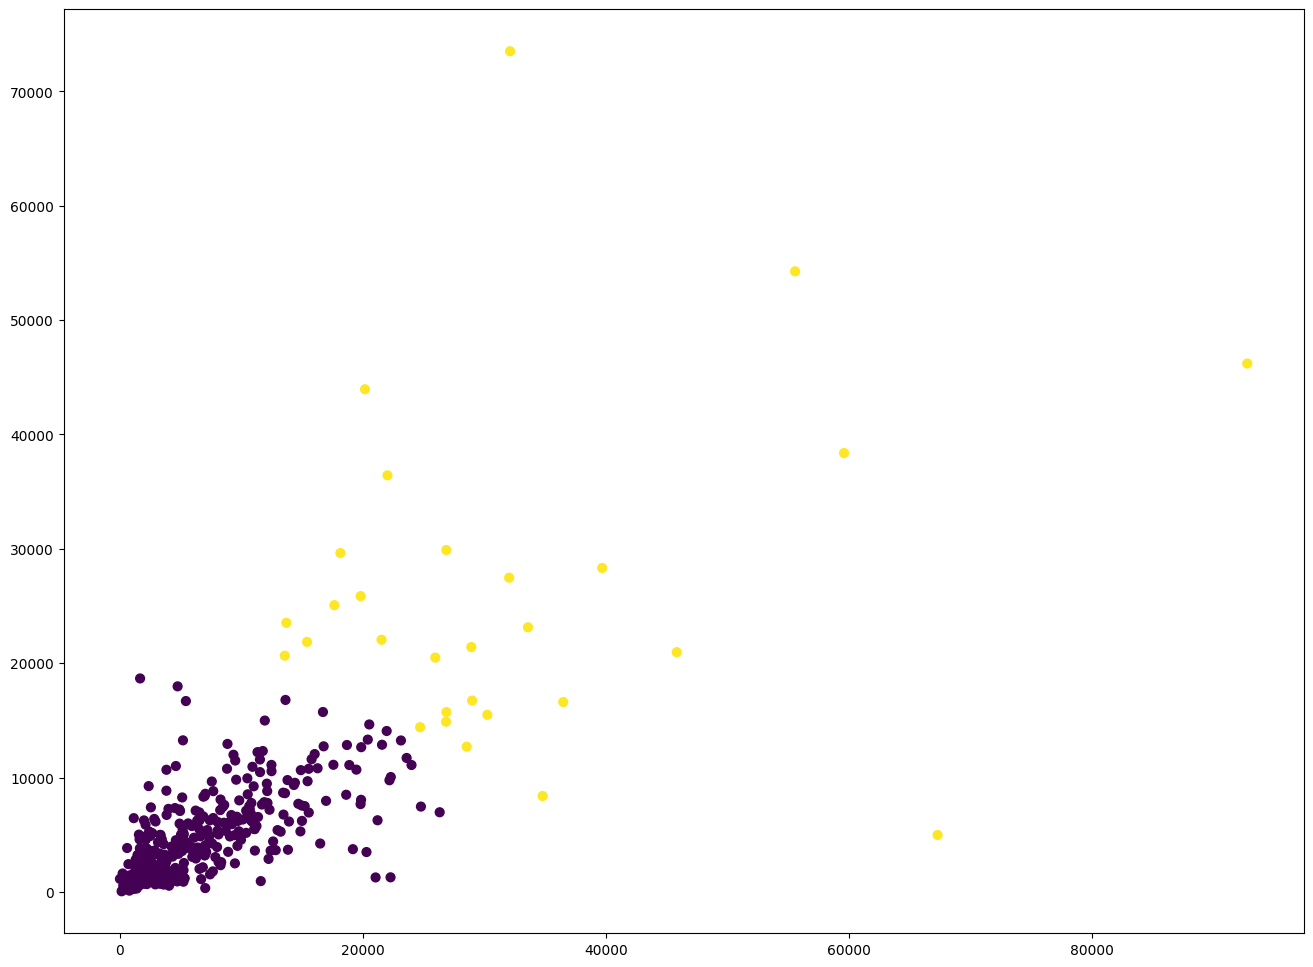

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['agc labels'])

**Q. So, why do we need to learn these two new algorithms?**
- If you notice carefully, a whole lot of customers are gruped together near the origin.

- At somewhere around the value of $(Groceris,Milk) = (25'000, 15'000)$, there are some noise points and that is where the customers are getting a little spread.

- Think of them as your premium segment customers from which the company makes a significant amount of sales.

- If we use hierarchical or K-Means clustering, chances are that significant part of these customers will get segment with regular ones (customers who spent less)

Let's see how DBSCAN tackles this problem.

#### **Fit and Transform using DBSCAN**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

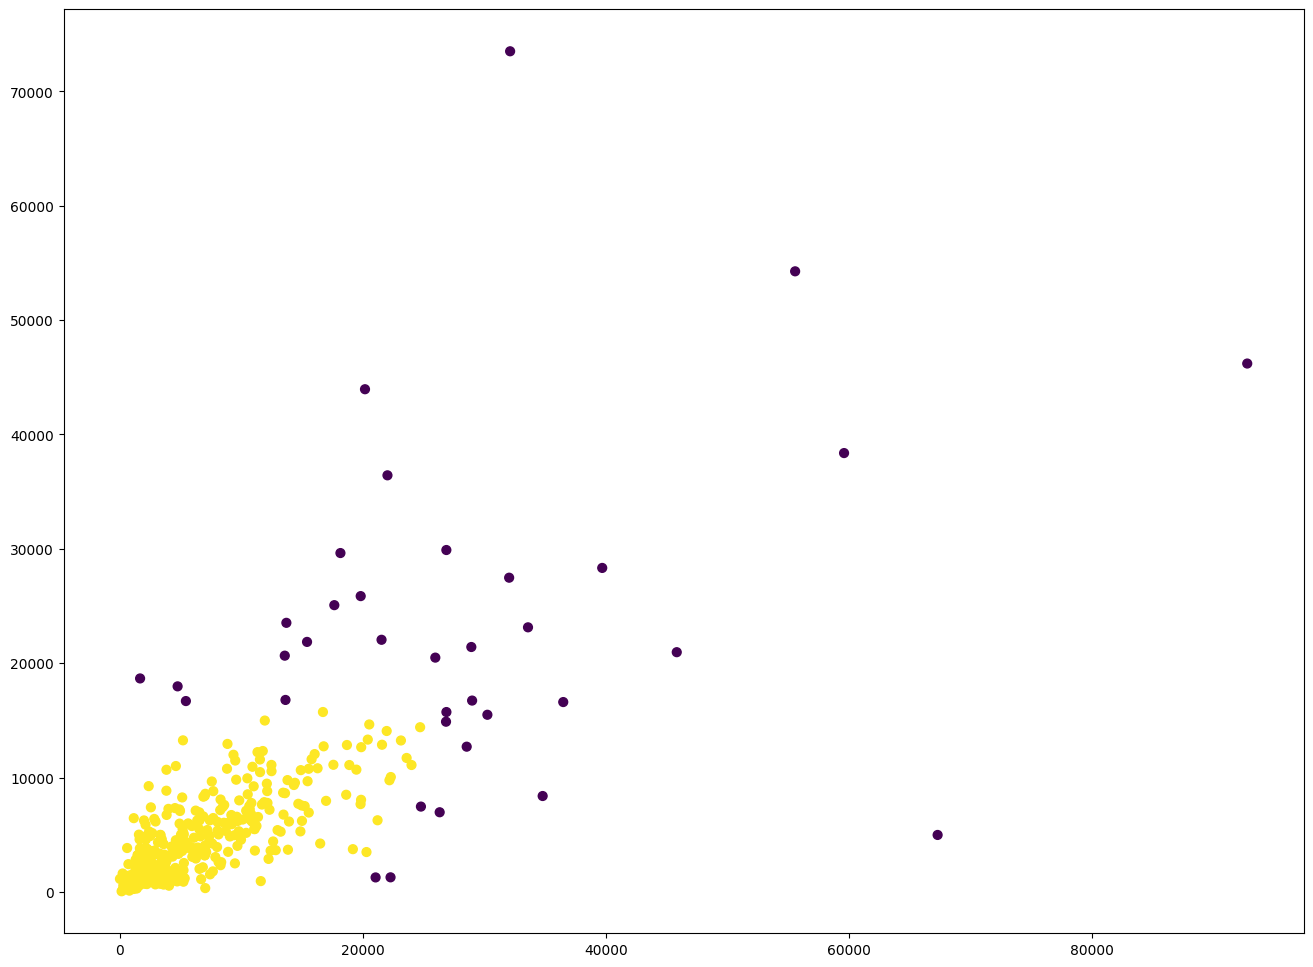

In [ ]:
plt.scatter(out_df['Grocery'], out_df['Milk'], s=40, c=out_df['label'])

#### **What insights can we draw from here?**

- Outliers are easily detected using DBSCAN, which can either be the premium segment customers, or they can just be customers with abnormal purchases.

- Most of the customers share the same behaviour (404 out of 440).

#### **Comparing with K-Means**

Let's now compare the results with K-Means' result

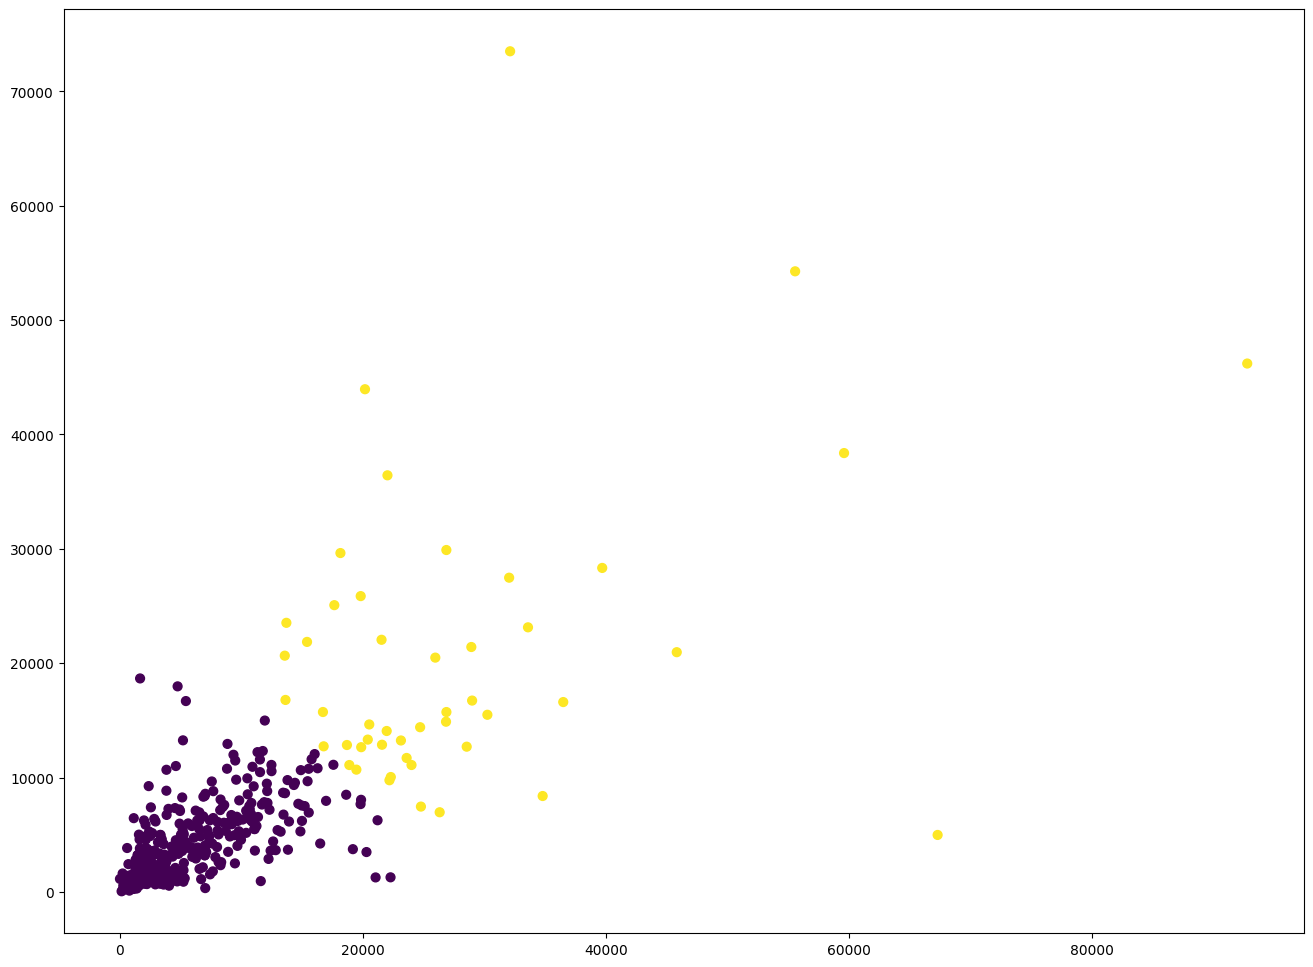

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], s=40, c=clusters['label'])

- As we can see, **K-Means formed 2 clusters with all the outliers included in one of the clusters.** Finding outliers or noise with K-Means is generally not possible because every point is grouped into a cluster.

- Whereas, **DBSCAN identified and separated out the outlier points**.